 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [212]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [213]:
# Reading whale returns
df_whale = pd.read_csv("Resources/whale_returns.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)

# Sort the values in descending order to put most recent returns first

# I can sort the data frame in descending while reading it in but I find this is cleaner and more readable
df_whale = df_whale.sort_index(ascending=False)

In [214]:
# I like to get a look at the data to see what I'm working with
df_whale.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702
2019-04-29,0.001254,0.002719,0.006251,0.005223
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848


In [215]:
# and to see the data types of columns
df_whale.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [216]:
# Count nulls
df_whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [217]:
# Drop nulls
df_whale = df_whale.dropna().copy()

In [218]:
# check that nulls have been dropped
df_whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [219]:
# Reading algorithmic returns
df_algo = pd.read_csv("Resources/algo_returns.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)

# Sort the values in descending order to put most recent returns first

# I can sort the data frame in descending while reading it in but I find this is cleaner and more readable
df_algo = df_algo.sort_index(ascending=False)

In [220]:
# I like to get a look at the data to see what I'm working with

df_algo.head()

,Algo 1,Algo 2
Date,,
2019-05-01,0.000094,-0.007358
2019-04-30,-0.002944,-0.001570
2019-04-29,0.005208,0.002829
2019-04-26,0.002981,0.005256
2019-04-25,0.000682,-0.007247


In [221]:
# and to see the data types of columns

df_algo.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

In [222]:
# Count nulls

df_algo.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [223]:
# Drop nulls
df_algo = df_algo.dropna().copy()

In [224]:
# check that nulls have been dropped
df_algo.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [225]:
# Reading S&P TSX 60 Closing Prices

sp_tsx_hist = pd.read_csv("Resources/sp_tsx_history.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)

# Sort the values in descending order to put most recent returns first

# I can sort the data frame in descending while reading it in but I find this is cleaner and more readable

sp_tsx_hist = sp_tsx_hist.sort_index(ascending=False)

In [226]:
# I like to get a look at the data to see what I'm working with and check all is working as expected

sp_tsx_hist.head()

,Close
Date,
2019-12-30,"$17,098.56"
2019-12-27,"$17,168.21"
2019-12-24,"$17,180.15"
2019-12-23,"$17,128.71"
2019-12-20,"$17,118.44"


In [227]:
# Check Data Types

sp_tsx_hist.dtypes

Close    object
dtype: object

In [228]:

# Fix Data Types


In [229]:
# First I need to remove the '$' symbol from the series

sp_tsx_hist["Close"] = sp_tsx_hist["Close"].str.replace("$", "", regex=True)
sp_tsx_hist.head()

,Close
Date,
2019-12-30,"17,098.56"
2019-12-27,"17,168.21"
2019-12-24,"17,180.15"
2019-12-23,"17,128.71"
2019-12-20,"17,118.44"


In [230]:
# And now to remove the ',' (comma) from the series

sp_tsx_hist["Close"] = sp_tsx_hist["Close"].str.replace(",", "", regex=True)
sp_tsx_hist.head()

,Close
Date,
2019-12-30,17098.56
2019-12-27,17168.21
2019-12-24,17180.15
2019-12-23,17128.71
2019-12-20,17118.44


In [231]:
#Now I can convert the data type of the "Close" column to float

sp_tsx_hist["Close"] = sp_tsx_hist["Close"].astype('float')

# And to confirm data conversion has worked as expected

sp_tsx_hist.dtypes

Close    float64
dtype: object

In [232]:
# Calculate Daily Returns

     # I calculate the daily return using the 'pct_change()' function
    
sp_tsx_hist["Close"] = sp_tsx_hist.pct_change()
sp_tsx_hist.head()

,Close
Date,
2019-12-30,NaN
2019-12-27,0.004073
2019-12-24,0.000695
2019-12-23,-0.002994
2019-12-20,-0.000600


In [233]:
# Count how many nulls there are in the DataFrame

sp_tsx_hist.isnull().sum()

Close    1
dtype: int64

In [234]:
# Drop nulls and check

sp_tsx_hist = sp_tsx_hist.dropna().copy()
sp_tsx_hist.isnull().sum()

Close    0
dtype: int64

In [235]:
# Rename `Close` Column to be specific to this portfolio.

sp_tsx_hist.rename(columns = {"Close":"S&P TSX"}, inplace=True)
sp_tsx_hist.head()

,S&P TSX
Date,
2019-12-27,0.004073
2019-12-24,0.000695
2019-12-23,-0.002994
2019-12-20,-0.000600
2019-12-19,-0.003178


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [292]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
joined_daily_returns = pd.concat([df_whale, df_algo, sp_tsx_hist ], axis='columns', join='inner')

joined_daily_returns.index = joined_daily_returns.index.date

# Take a look at my final data frame

joined_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833,0.000094,-0.007358,0.005598
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702,-0.002944,-0.001570,0.004725
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,0.001185
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.000789
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.002249


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

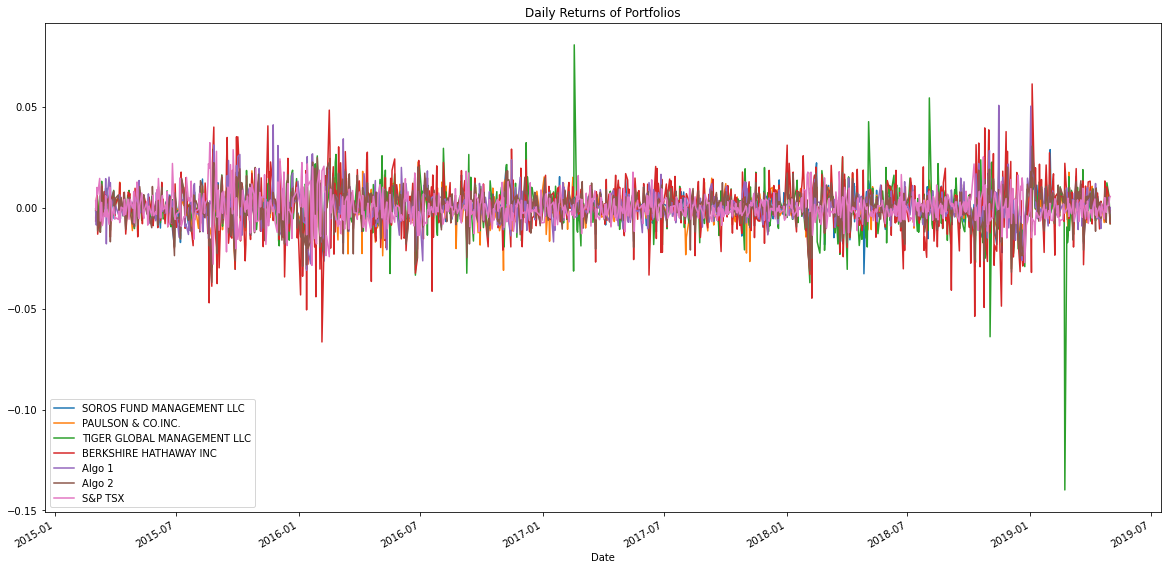

In [237]:
# Plot daily returns of all portfolios

# Here I have increased the size of the plot to make it slightly more relevant
# I have added a legend
# And given the plot a title

returns_plt = joined_daily_returns.plot(figsize=(20,10),legend=True, title="Daily Returns of Portfolios")

#### Calculate and Plot cumulative returns.

In [238]:
# Calculate cumulative returns of all portfolios

cumulative_returns = (1 + joined_daily_returns).cumprod() -1
cumulative_returns.head().sum()


SOROS FUND MANAGEMENT LLC     -0.014729
PAULSON & CO.INC.              0.009595
TIGER GLOBAL MANAGEMENT LLC   -0.002658
BERKSHIRE HATHAWAY INC        -0.012765
Algo 1                         0.010934
Algo 2                        -0.031404
S&P TSX                        0.049907
dtype: float64

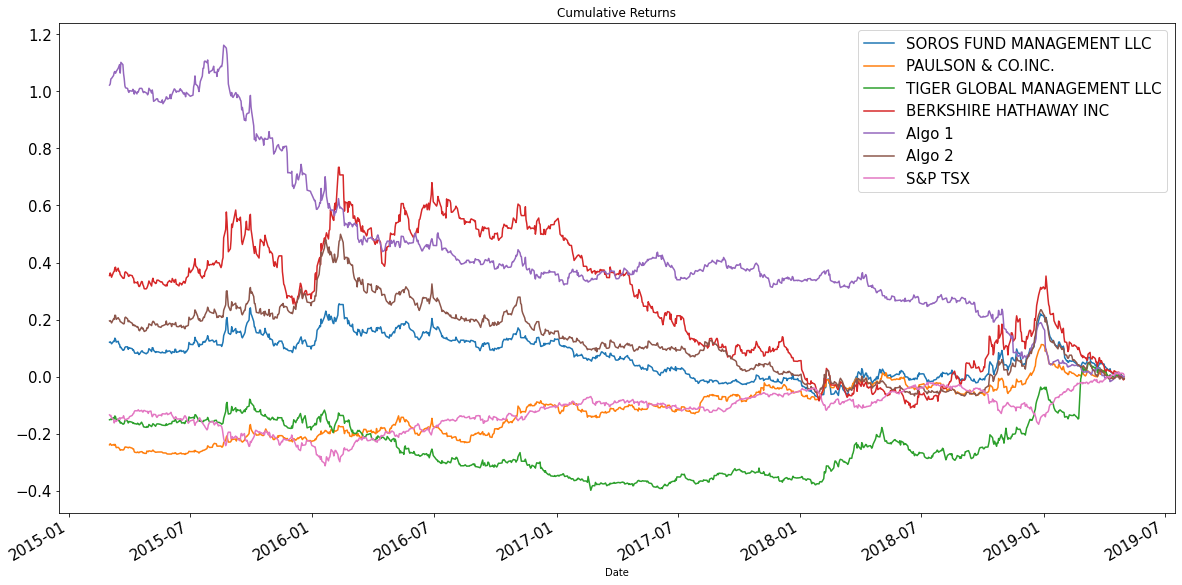

In [239]:
# Plot cumulative returns

#I have increased the figure size and the font size to make the figure easier to understand

cumu_plot = cumulative_returns.plot(figsize=(20,10), fontsize=15, title="Cumulative Returns")

#Here I increase the legend fontsize so that we can more easily identify the portfolios in the figure
cumu_plot.legend(fontsize=15)

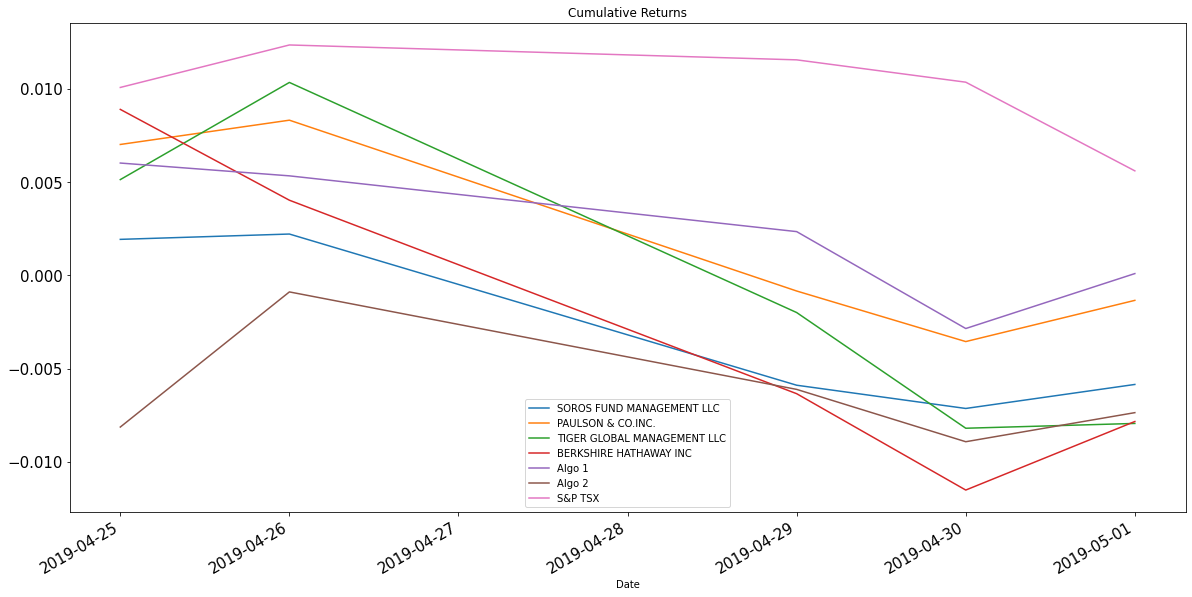

In [240]:
#I can plot the last 10 values of cumulative returns to better see results

cumu_plot = cumulative_returns.head().plot( figsize=(20,10), fontsize=15, title="Cumulative Returns")

<AxesSubplot:xlabel='Date'>

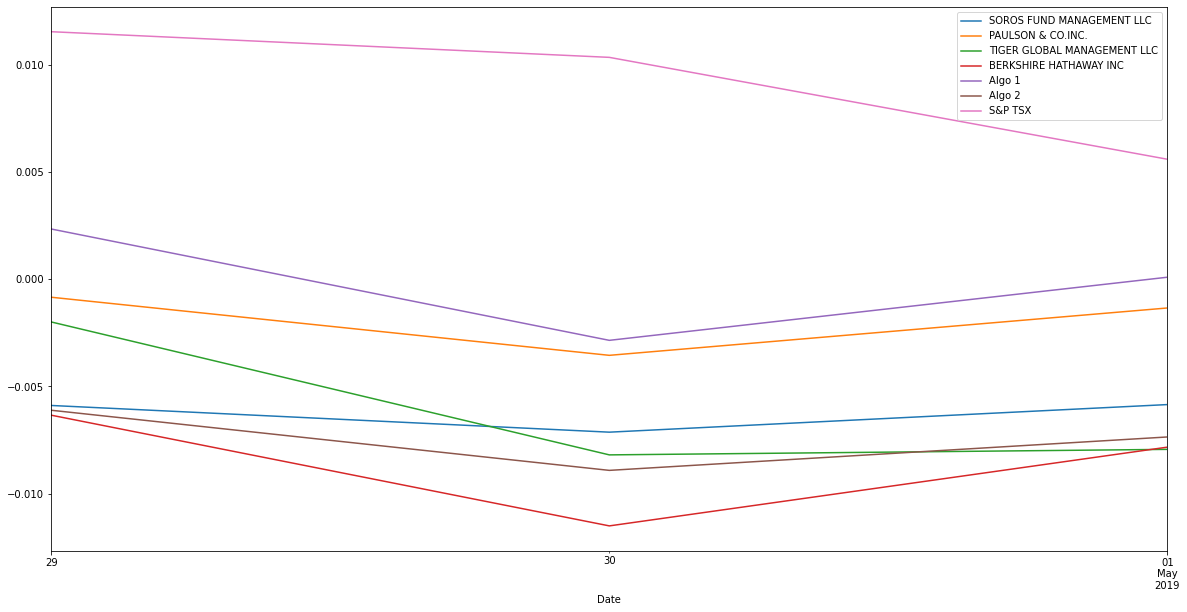

In [241]:
#Or filter the values plotted by selecting dates using .loc
#giving a cleaner x-axis

filtered_df = cumulative_returns.loc['2019-04-26':'2019-05-01']
filtered_df.plot(figsize=(20,10))

It is clear from the plot above that 0 portfolios outperform the S&P:

Algo 1 has the most outstanding results of all portfolios.

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Risk Relation Between Portfolios (Box Plot)'}>

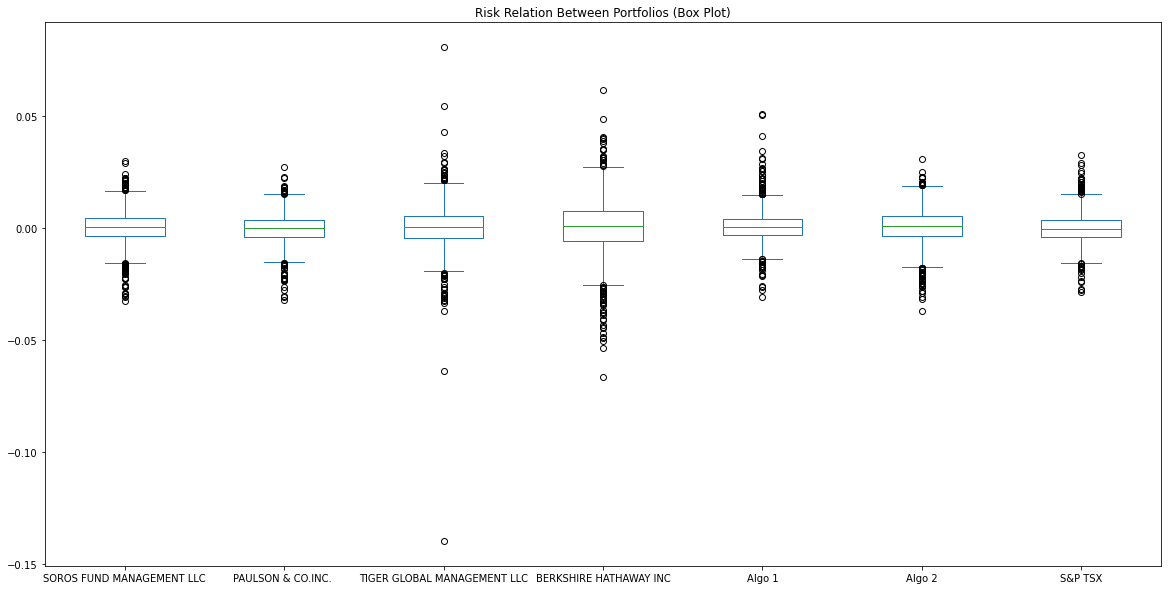

In [242]:
# Box plot to visually show risk

# The labels of each portfolio ran together in some cases so I increased the figure size on the x-axis to ensure readability

joined_daily_returns.plot.box(fontsize=10, figsize=(20,10), title="Risk Relation Between Portfolios (Box Plot)")

### Calculate Standard Deviations

In [243]:
# Calculate the daily standard deviations of all portfolios

daily_std = joined_daily_returns.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX                        0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [244]:
# Calculate  the daily standard deviation of S&P TSX 60

s_p_std = joined_daily_returns["S&P TSX"].std()
s_p_std

0.007033599418186623


#### Determine which portfolios are riskier than the S&P TSX 60


In [245]:
# If I sort the standard deviation of all portfolios in descending order 
# we can see the relative risk for all portfolios

daily_std = daily_std.sort_values(ascending=False)
daily_std

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
S&P TSX                        0.007034
PAULSON & CO.INC.              0.006982
dtype: float64

In [246]:
# Which portfolios have less risk than the S&P TSX?

daily_std[(daily_std < daily_std["S&P TSX"])]

PAULSON & CO.INC.     0.006982
dtype: float64

In [247]:
# And finally which portfolios are riskier than the S&P TSX 60

daily_std[(daily_std > daily_std["S&P TSX"])]

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
dtype: float64

### Calculate the Annualized Standard Deviation

In [248]:
# Calculate the annualized standard deviation (252 trading days)

annualized_std = daily_std * np.sqrt(252)
annualized_std

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
S&P TSX                        0.111655
PAULSON & CO.INC.              0.110841
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [249]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
joined_daily_returns.rolling(window=21).std()
joined_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833,0.000094,-0.007358,0.005598
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702,-0.002944,-0.001570,0.004725
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,0.001185
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.000789
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.002249


<AxesSubplot:title={'center':'Rolling Standard Deviation'}, xlabel='Date'>

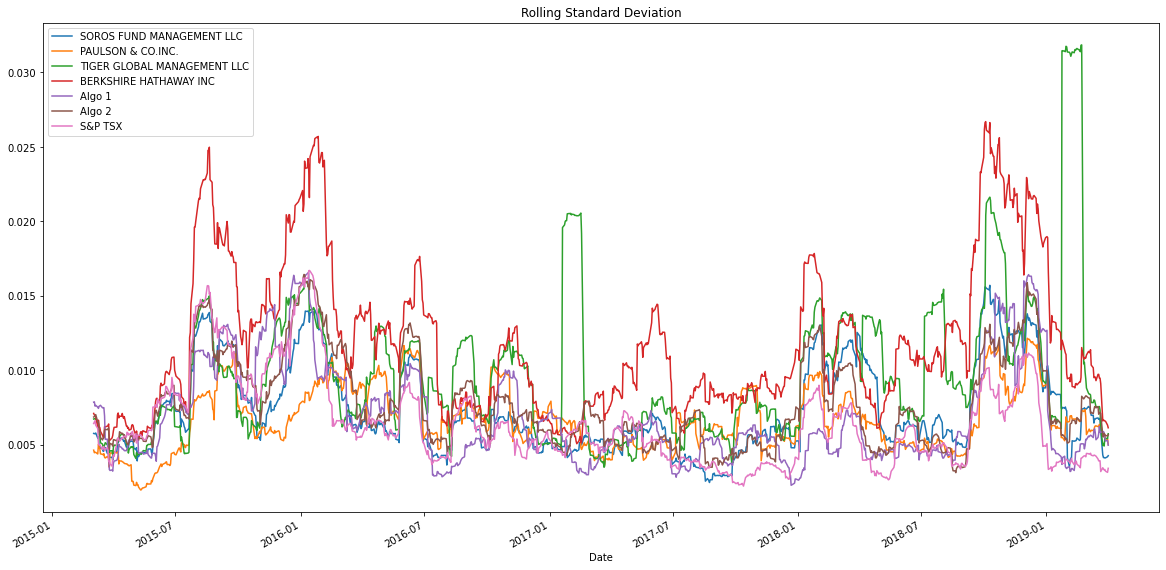

In [250]:
# Plot the rolling standard deviation
joined_daily_returns.rolling(window=21).std().plot(figsize=(20,10), title="Rolling Standard Deviation")

### Calculate and plot the correlation

In [251]:
# Calculate the correlation

price_correlation = joined_daily_returns.corr() 

# Display de correlation matrix

price_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,-0.096489
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,-0.062559
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,-0.069013
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,-0.087172
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,-0.101408
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,-0.091453
S&P TSX,-0.096489,-0.062559,-0.069013,-0.087172,-0.101408,-0.091453,1.000000


In [252]:
# I can round the correlation values to 2 decimal places to make it easier to read

price_correlation.round(2)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.00,0.70,0.56,0.75,0.31,0.83,-0.10
PAULSON & CO.INC.,0.70,1.00,0.43,0.54,0.27,0.67,-0.06
TIGER GLOBAL MANAGEMENT LLC,0.56,0.43,1.00,0.42,0.16,0.51,-0.07
BERKSHIRE HATHAWAY INC,0.75,0.54,0.42,1.00,0.29,0.68,-0.09
Algo 1,0.31,0.27,0.16,0.29,1.00,0.29,-0.10
Algo 2,0.83,0.67,0.51,0.68,0.29,1.00,-0.09
S&P TSX,-0.10,-0.06,-0.07,-0.09,-0.10,-0.09,1.00


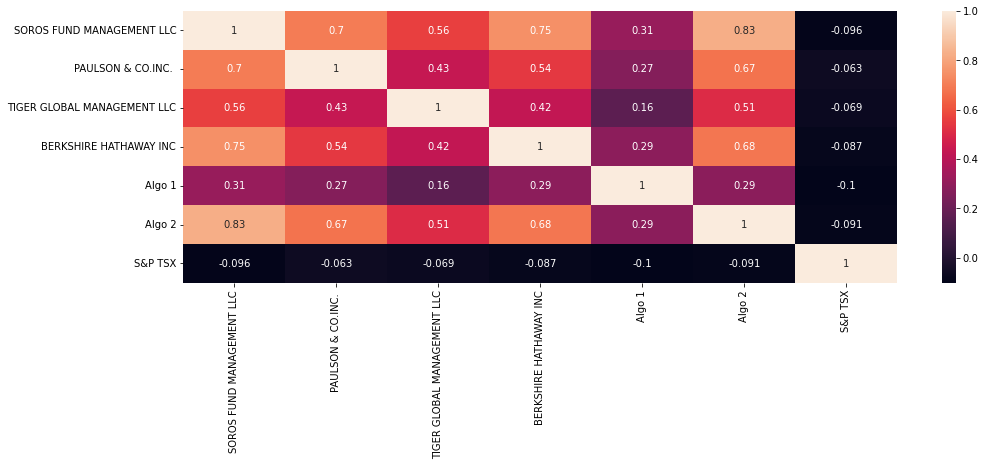

In [253]:
# A heatmap is a nice visual where, by aslo including the numerical values, correlation is more easily identified.

plt.figure(figsize = (16,5))
sns.heatmap(price_correlation, annot=True)
plt.show()

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [254]:
# Calculate covariance of a single portfolio

covariance = joined_daily_returns["Algo 1"].cov(joined_daily_returns["S&P TSX"])
covariance

-5.412887545328762e-06

In [255]:
# Calculate variance of S&P TSX

variance = joined_daily_returns["S&P TSX"].var()
variance

4.947152077551521e-05

In [256]:
# Computing beta

algo1_beta = covariance / variance
algo1_beta

-0.10941421368246569

In [257]:

# Plot beta trend


<AxesSubplot:title={'center':'Rolling 60-Day Beta of Algo 1'}, xlabel='Date'>

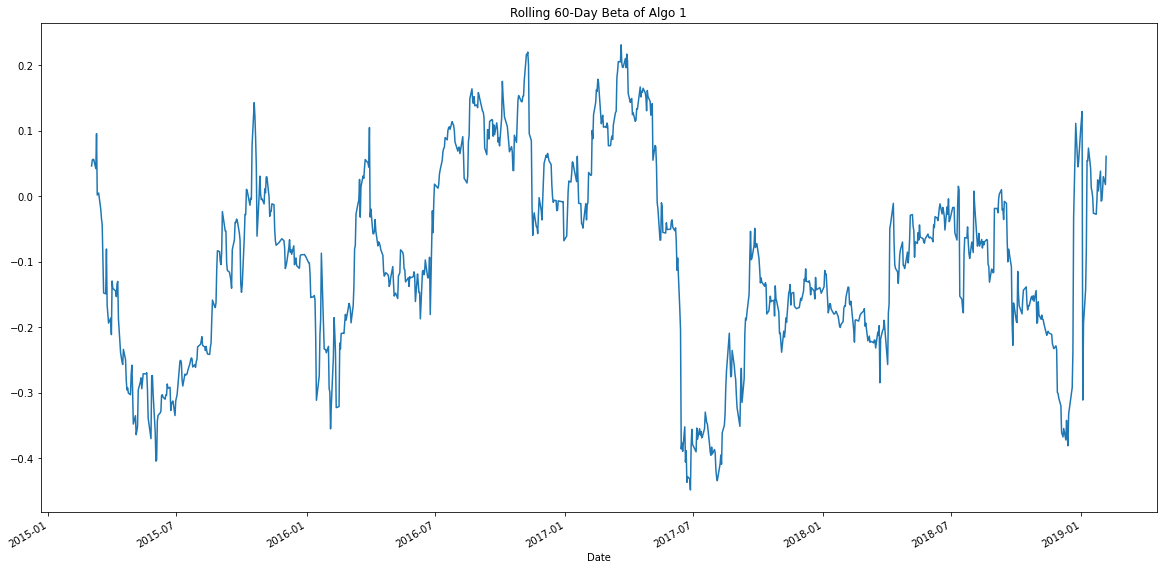

In [258]:
#To plot the beta trend first we need the rolling covariance of Algo 1 vs. S&P TSX
#This is for a 60 day window

rolling_covariance = joined_daily_returns["Algo 1"].rolling(window=60).cov(joined_daily_returns["S&P TSX"])

#We also need the rolling variance for S&P TSX, again with a 60 day window

rolling_variance = joined_daily_returns["S&P TSX"].rolling(window=60).var()

#Now we can calculate our "rolling beta" or "beta trend"

rolling_beta = rolling_covariance / rolling_variance

#And plot

rolling_beta.plot(figsize=(20, 10), title="Rolling 60-Day Beta of Algo 1")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [259]:
# Use `ewm` to calculate the rolling window
joined_daily_returns.ewm(halflife=21).std()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2019-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-30,0.003219,0.000615,0.005429,0.002921,0.002148,0.004093,0.000617
2019-04-29,0.003586,0.002656,0.007094,0.006698,0.004158,0.005101,0.002351
2019-04-26,0.005868,0.005236,0.008696,0.008312,0.003538,0.005510,0.002438
2019-04-25,0.005061,0.004778,0.008326,0.007321,0.003056,0.005771,0.003189
...,...,...,...,...,...,...,...
2015-03-09,0.005725,0.004473,0.006299,0.007371,0.006653,0.006460,0.006406
2015-03-06,0.005837,0.004468,0.006407,0.007640,0.006618,0.006695,0.006420
2015-03-05,0.005777,0.004438,0.006312,0.007612,0.006514,0.006632,0.006569


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [260]:
# Annualized Sharpe Ratios
# I am assuming the risk free rate is 0. If it wasn't I would subtract it from the numerator in the below equation

sharpe_ratios = ((joined_daily_returns.mean() * 252) / (joined_daily_returns.std() * np.sqrt(252)))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                       -0.259864
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

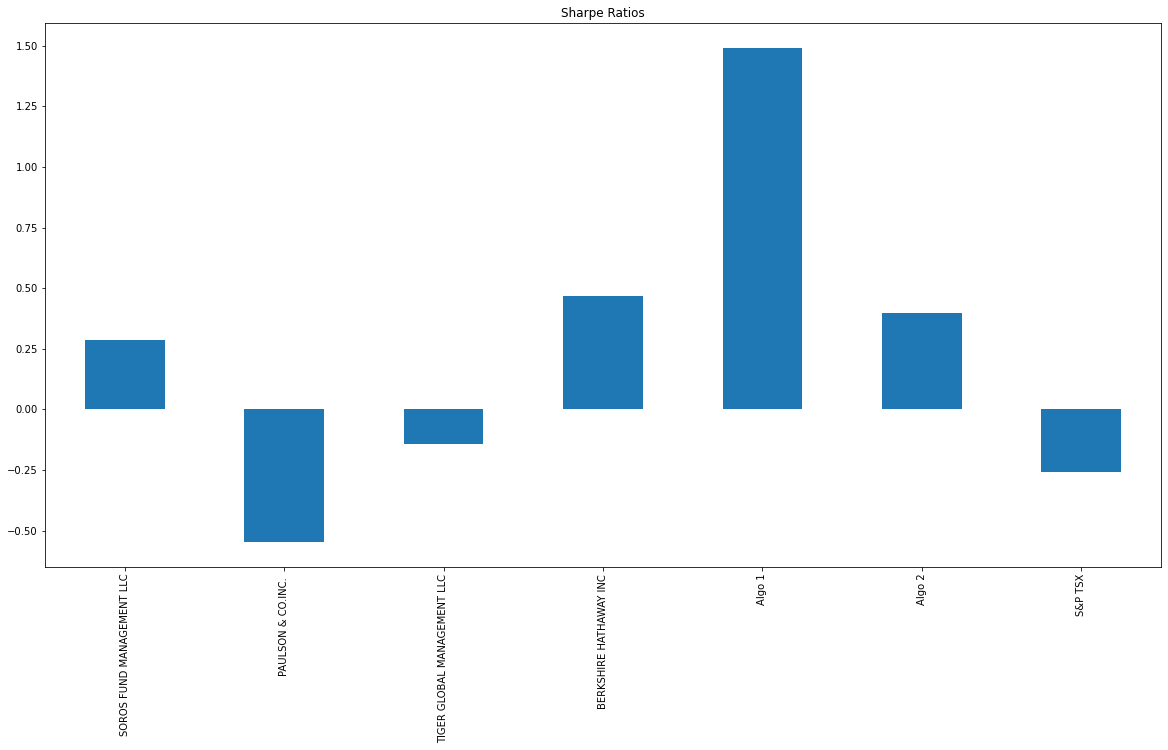

In [261]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", figsize=(20,10), title="Sharpe Ratios") 

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---Both Algorithmic trading strategies outperform the S&P TSX 60, with Algo 1 doing so by quite a large margin.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [262]:
# Reading data from 1st stock
twtr_path = Path("Resources/twtr_historical.csv")

twtr_df = pd.read_csv(twtr_path, index_col='Date', parse_dates=True, infer_datetime_format=True)

twtr_df.index = twtr_df.index.date

twtr_df.head()

,TWTR,Unnamed: 1,Close
2015-03-03,close,NaN,47.71
2015-04-03,3/3/2015,NaN,47.57
2015-05-03,1/5/2019,NaN,47.35
2015-06-03,NaN,NaN,46.75
2015-09-03,NaN,NaN,47.59


In [263]:
#Here I drop the "TWTR" AND "Unnamed" columns
twtr_df.drop("TWTR", axis=1, inplace=True)
twtr_df.drop("Unnamed: 1", axis=1, inplace=True)


twtr_df.head()

,Close
2015-03-03,47.71
2015-04-03,47.57
2015-05-03,47.35
2015-06-03,46.75
2015-09-03,47.59


In [264]:
#And rename the "Close" column to be specific to this dataframe

twtr_df.rename(columns = {"Close":"TWTR"}, inplace = True)

twtr_df.head()

,TWTR
2015-03-03,47.71
2015-04-03,47.57
2015-05-03,47.35
2015-06-03,46.75
2015-09-03,47.59


In [265]:
# Reading data from 2nd stock

gme_path = Path("Resources/gme_historical.csv")

gme_df = pd.read_csv(gme_path, index_col='Date', parse_dates=True, infer_datetime_format=True)


gme_df.index = gme_df.index.date


gme_df.head()

,GME,Close
2015-03-03,close,38.68
2015-04-03,3/3/2015,40.03
2015-05-03,1/5/2019,40.00
2015-06-03,NaN,40.16
2015-09-03,NaN,40.83


In [266]:
#Here I drop the "GME" column
gme_df.drop("GME", axis=1, inplace=True)
gme_df.head()

,Close
2015-03-03,38.68
2015-04-03,40.03
2015-05-03,40.00
2015-06-03,40.16
2015-09-03,40.83


In [267]:
#And rename the "Close" column to be specific to this dataframe

gme_df.rename(columns = {"Close":"GME"}, inplace = True)

In [268]:
# Reading data from 3rd stock

dell_path = Path("Resources/dell_historical.csv")

dell_df = pd.read_csv(dell_path, index_col='Date', parse_dates=True, infer_datetime_format=True)


dell_df.index = dell_df.index.date
dell_df.head()

,DELL,Close
2018-12-21,close,14.62
2018-12-24,3/3/2015,11.45
2018-12-26,1/5/2019,11.54
2018-12-27,NaN,11.38
2018-12-28,NaN,11.68


In [269]:
#Here I drop the "DELL" and "Date" columns
dell_df.drop("DELL", axis=1, inplace=True)

dell_df.head()

,Close
2018-12-21,14.62
2018-12-24,11.45
2018-12-26,11.54
2018-12-27,11.38
2018-12-28,11.68


In [270]:
#And rename the "Close" column to be specific to this dataframe

dell_df.rename(columns = {"Close":"DELL"}, inplace = True)

In [271]:
# Combine all stocks in a single DataFrame
joined_portfolio = pd.concat([dell_df, twtr_df, gme_df], axis='columns', join='inner')
joined_portfolio.head()

,DELL,TWTR,GME
2018-12-21,14.62,27.31,11.96
2018-12-24,11.45,26.45,11.67
2018-12-26,11.54,28.66,12.40
2018-12-27,11.38,28.68,12.18
2018-12-28,11.68,28.43,12.28


In [272]:
# Reset Date index


In [273]:
# Reorganize portfolio data by having a column per symbol


In [274]:
# Calculate daily returns
my_portfolio = joined_portfolio.pct_change()
my_portfolio.head()

,DELL,TWTR,GME
2018-12-21,NaN,NaN,NaN
2018-12-24,-0.216826,-0.031490,-0.024247
2018-12-26,0.007860,0.083554,0.062554
2018-12-27,-0.013865,0.000698,-0.017742
2018-12-28,0.026362,-0.008717,0.008210


In [275]:
# Drop NAs
my_portfolio.isnull().sum()

my_portfolio = my_portfolio.dropna()

my_portfolio.isnull().sum()

DELL    0
TWTR    0
GME     0
dtype: int64

In [276]:
# Display sample data
my_portfolio.head()

,DELL,TWTR,GME
2018-12-24,-0.216826,-0.031490,-0.024247
2018-12-26,0.007860,0.083554,0.062554
2018-12-27,-0.013865,0.000698,-0.017742
2018-12-28,0.026362,-0.008717,0.008210
2018-12-31,0.075342,0.010904,0.027687


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [277]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_portfolio = my_portfolio.dot(weights)

# Display sample data
weighted_portfolio.head()


2018-12-24   -0.090855
2018-12-26    0.051323
2018-12-27   -0.010303
2018-12-28    0.008618
2018-12-31    0.037978
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [300]:
# Join your returns DataFrame to the original returns DataFrame
all_portfolios = pd.concat([joined_daily_returns, weighted_portfolio], axis='columns', join='inner')

all_portfolios.rename(columns={0:"MY PORTFOLIO"}, inplace=True)
all_portfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,MY PORTFOLIO
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702,-0.002944,-0.001570,0.004725,0.006399
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,0.001185,0.005686
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.000789,-0.008719
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.002249,-0.005373
2019-04-24,0.002284,0.001009,-0.004000,-0.006386,0.001095,0.000399,0.000629,0.006860


In [301]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolios.isnull().sum()
all_portfolios = all_portfolios.dropna()
all_portfolios.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P TSX                        0
MY PORTFOLIO                   0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [303]:
# Calculate the annualized `std`

new_annualized_std = all_portfolios * np.sqrt(252)
new_annualized_std.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,MY PORTFOLIO
2019-04-30,-0.020550,-0.035106,-0.004115,-0.058766,-0.046733,-0.024917,0.075011,0.101584
2019-04-29,0.019912,0.043165,0.099226,0.082917,0.082673,0.044914,0.018803,0.090259
2019-04-26,0.129369,0.145437,0.196127,0.165633,0.047324,0.083431,0.012518,-0.138407
2019-04-25,-0.004522,-0.020491,-0.081804,0.076956,0.010834,-0.115050,-0.035698,-0.085291
2019-04-24,0.036256,0.016011,-0.063496,-0.101371,0.017386,0.006337,0.009979,0.108894


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

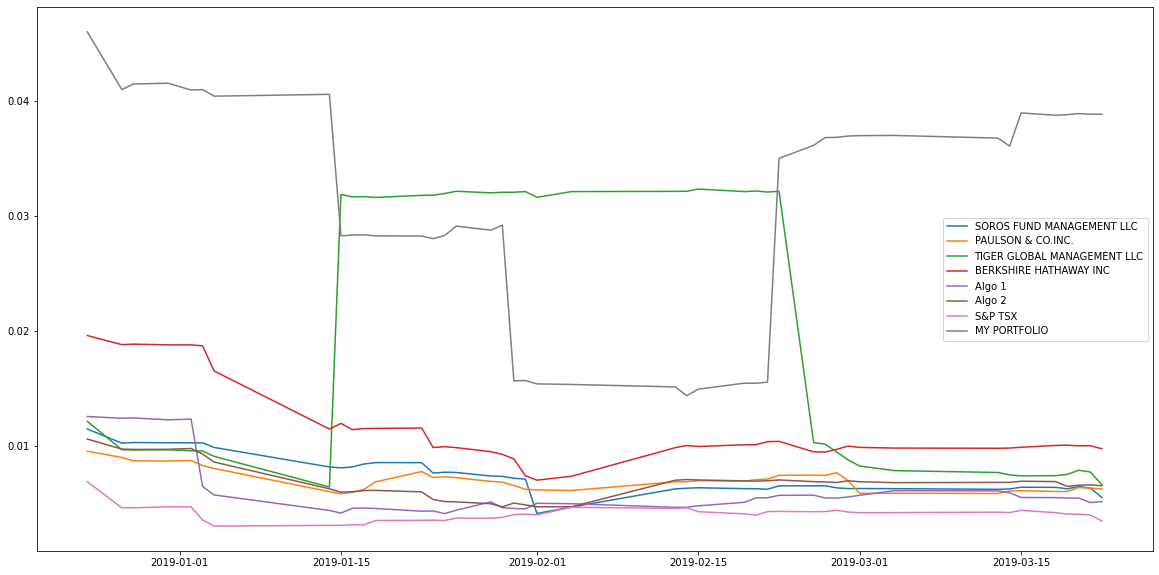

In [307]:
# Calculate rolling standard deviation
new_rolling_std = all_portfolios.rolling(window=21).std()
new_rolling_std.tail()
# Plot rolling standard deviation
new_rolling_std.plot(figsize=(20,10))

### Calculate and plot the correlation

In [308]:
# Calculate and plot the correlation
all_correlation = all_portfolios.corr() 
all_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,MY PORTFOLIO
SOROS FUND MANAGEMENT LLC,1.000000,0.764986,0.375392,0.764896,0.155132,0.799245,0.290400,0.355965
PAULSON & CO.INC.,0.764986,1.000000,0.270185,0.638464,0.283718,0.747004,0.099101,0.324143
TIGER GLOBAL MANAGEMENT LLC,0.375392,0.270185,1.000000,0.132365,0.052300,0.197268,0.149020,0.074939
BERKSHIRE HATHAWAY INC,0.764896,0.638464,0.132365,1.000000,0.084943,0.770805,0.171184,0.292376
Algo 1,0.155132,0.283718,0.052300,0.084943,1.000000,0.323999,0.194575,0.005424
Algo 2,0.799245,0.747004,0.197268,0.770805,0.323999,1.000000,0.252915,0.261746
S&P TSX,0.290400,0.099101,0.149020,0.171184,0.194575,0.252915,1.000000,0.239086
MY PORTFOLIO,0.355965,0.324143,0.074939,0.292376,0.005424,0.261746,0.239086,1.000000


In [309]:
# I can round the correlation values to 2 decimal places to make it easier to read

all_correlation.round(2)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,MY PORTFOLIO
SOROS FUND MANAGEMENT LLC,1.00,0.76,0.38,0.76,0.16,0.80,0.29,0.36
PAULSON & CO.INC.,0.76,1.00,0.27,0.64,0.28,0.75,0.10,0.32
TIGER GLOBAL MANAGEMENT LLC,0.38,0.27,1.00,0.13,0.05,0.20,0.15,0.07
BERKSHIRE HATHAWAY INC,0.76,0.64,0.13,1.00,0.08,0.77,0.17,0.29
Algo 1,0.16,0.28,0.05,0.08,1.00,0.32,0.19,0.01
Algo 2,0.80,0.75,0.20,0.77,0.32,1.00,0.25,0.26
S&P TSX,0.29,0.10,0.15,0.17,0.19,0.25,1.00,0.24
MY PORTFOLIO,0.36,0.32,0.07,0.29,0.01,0.26,0.24,1.00


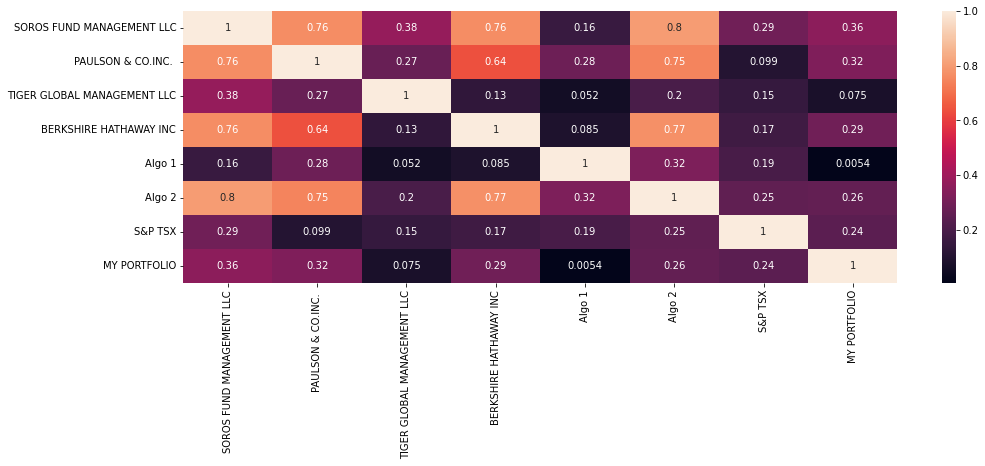

In [310]:
# A heatmap is a nice visual where, by aslo including the numerical values, correlation is more easily identified.

plt.figure(figsize = (16,5))
sns.heatmap(all_correlation, annot=True)
plt.show()

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [315]:
# Calculate and plot Beta
# Calculate covariance of a single portfolio

new_covariance = all_portfolios["MY PORTFOLIO"].cov(all_portfolios["S&P TSX"])
new_covariance

4.5606038023699115e-05

In [316]:
# Calculate variance of S&P TSX

new_variance = all_portfolios["S&P TSX"].var()
new_variance

2.922290975991129e-05

In [317]:
# Computing beta

my_portfolio_beta = new_covariance / new_variance
my_portfolio_beta

1.5606261798837913

<AxesSubplot:title={'center':"Rolling 60-Day Beta of 'MY PORTFOLIO'"}>

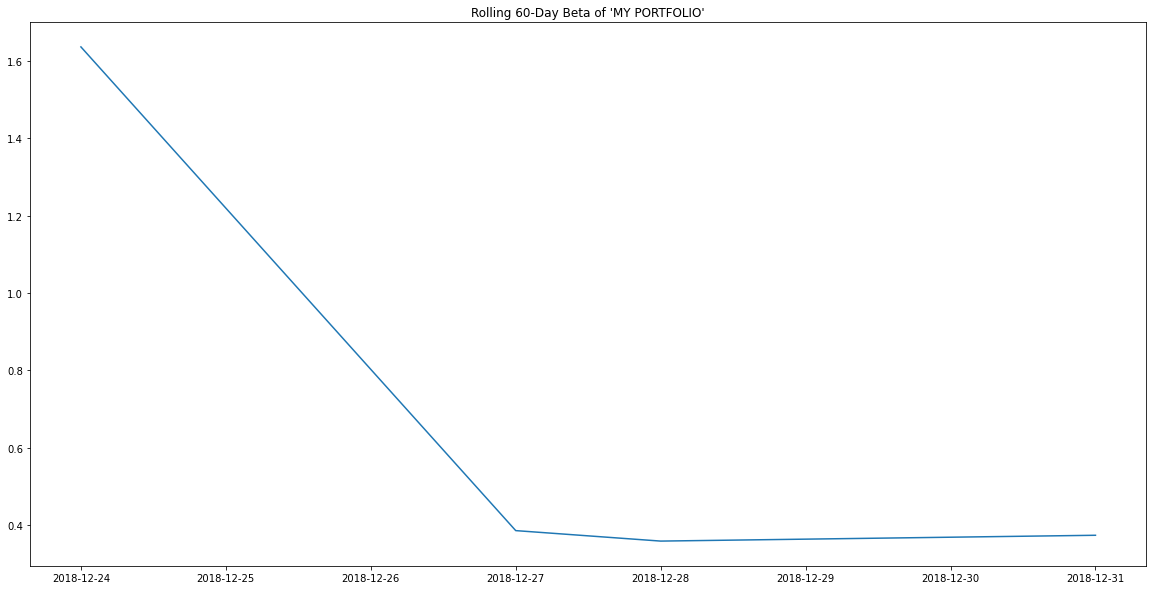

In [319]:
#To plot the beta trend first we need the rolling covariance of "MY PORTFOLIO" vs. S&P TSX
#This is for a 60 day window

new_rolling_covariance = all_portfolios["MY PORTFOLIO"].rolling(window=60).cov(all_portfolios["S&P TSX"])

#We also need the rolling variance for S&P TSX, again with a 60 day window

new_rolling_variance = all_portfolios["S&P TSX"].rolling(window=60).var()

#Now we can calculate our "rolling beta" or "beta trend"

new_rolling_beta = new_rolling_covariance / new_rolling_variance

#And plot

new_rolling_beta.plot(figsize=(20, 10), title="Rolling 60-Day Beta of 'MY PORTFOLIO'")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [320]:
# Calculate Annualized Sharpe Ratios
# Annualized Sharpe Ratios
# I am assuming the risk free rate is 0. If it wasn't I would subtract it from the numerator in the below equation

new_sharpe_ratios = ((all_portfolios.mean() * 252) / (all_portfolios.std() * np.sqrt(252)))
new_sharpe_ratios

SOROS FUND MANAGEMENT LLC      4.092627
PAULSON & CO.INC.              2.072630
TIGER GLOBAL MANAGEMENT LLC   -0.672878
BERKSHIRE HATHAWAY INC         3.876455
Algo 1                         3.928267
Algo 2                         4.918367
S&P TSX                       -6.933834
MY PORTFOLIO                   1.612286
dtype: float64

<AxesSubplot:title={'center':'Final Sharpe Ratios'}>

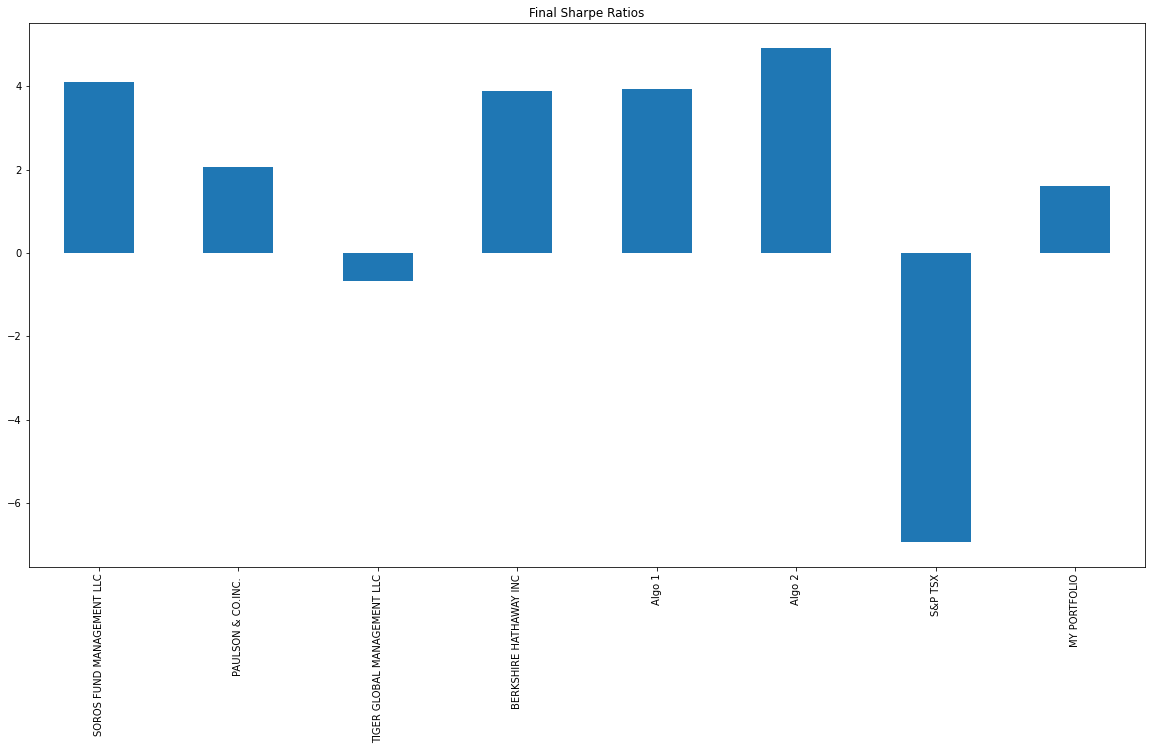

In [321]:
# Visualize the sharpe ratios as a bar plot
new_sharpe_ratios.plot(kind="bar", figsize=(20,10), title="Final Sharpe Ratios") 

### How does your portfolio do?

Write your answer here!